# Настройка ноутбука

In [5]:
import pandas as pd
import numpy as np
import datetime as dt

import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Описание

**Курс:**
- [Stepik: Основы статистики - Доверительные интервалы](https://stepik.org/lesson/8079?unit=1359)


**Видео:**
- [Доверительный интервал за 15 мин. Биостатистика](https://youtu.be/MstzroncW28)
- [Confidence Intervals, Clearly Explained!!!](https://www.youtube.com/watch?v=TqOeMYtOc1w&ab_channel=StatQuestwithJoshStarmer)
- [Bootstrapping Main Ideas!!!](https://www.youtube.com/watch?v=Xz0x-8-cgaQ&ab_channel=StatQuestwithJoshStarmer)

**Статьи:**
- [Yandex: Что такое доверительные интервалы в статистике?](https://dzen.ru/media/id/5ee4e19276f3fc727f6774da/chto-takoe-doveritelnye-intervaly-v-statistike-6071c861aace2a335885cf10)
- [GeeksforGeeks: examples](https://www.geeksforgeeks.org/how-to-calculate-confidence-intervals-in-python/) 
- [GeeksforGeeks: visualization](https://www.geeksforgeeks.org/how-to-plot-a-confidence-interval-in-python)


# Доверительный интервал

"Вся статистика нам говорит о том, что если у нас есть выборочные данные, мы не можем ответить на вопрос, чему на самом деле что-то равно. Но мы можем дать некоторый диапазон, в котором скорее всего это что-то лежит." - Анатолий Карпов

Представим, что из генеральной совокупности нам дали выборку из 100 элементов. Всего одну выборку. И мы хотим оценить среднее генеральной совокупности. Но как это сделать, если у нас всего одна выборка? Если бы у нас было много выборок, то с помощью центральной предельной теоремы мы могли бы построить распределение средних значений таких выборок и найти среднее значение такого распределение, которое и являлось бы средним значением генеральной совокупности. 

Но у нас, всего одна выборка из 100 элементов. Поэтому, как бы мы ни старались, у нас слишком мало информации, чтобы дать точный ответ - чему равно среднее генеральной совокупности. Зато мы можем примерно оценить, в каком интервале относительно среднего выборки лежит среднее генеральной совокупности. 

Для этого и служат доверительные интервалы. Как же повезло, что средние значения воборок распределени номрально, согласно ЦПТ, так как это позволяет нам оперировать правилами сигм. Расчитав стандартное отклонение для выборочного среднего, согласно ЦПТ, мы можем воспользоваться правилом 2х сигм и утвержать что в этом пределе находится среднее генеральной совокупности с вероятностью 95%.

<img src="../data/img/Confidence_interval_1.png" width="380">

## Формула

<img src="../data/img/Confidence_interval_formula.png" width="150">

```text
x - среднее значение выборки (sample mean)
n - размер выборки (sample size)
s - стандартное отклонение выборки (sample standart deviation)

z - уровень доверительного интервала
```



<img src="../data/img/Confidence_interval_2.png" width="380">

### Вопросы

**Почему мы берем 1,96 se, а не 2se, например?**
По определению нормального распределения, 95% всех наблюдений лежат приблизительно в диапазоне +/- 2 sd от среднего. Так вот 1,96 - это более точная оценка.

### Тестовые вопросы:

**Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?**

- [X] Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.
- [ ] Если многократно повторять эксперимент, то 95 % выборочных средних значений будут принадлежать рассчитанному нами доверительному интервалу.
- [ ] Среднее значение в генеральной совокупности точно принадлежит рассчитанному доверительному интервалу.
- [ ] Среднее значение в генеральной совокупности точно превышает нижнюю границу 95% доверительного интервала.
- [X] Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.

**Если бы в нашем примере мы увеличили объем выборки в два раза (при условии, что показатель стандартного отклонения остался неизменным), то 95% доверительный интервал...**

- [ ] стал более широким
- [X] стал более узким
- [ ] возможны оба варианта

## Выделение нескольких выборок из генеральной совокупности

In [8]:
M = 3 
sigma = 2 
N = 10_000

genpop = pd.Series(np.random.normal(M, sigma, N))

In [9]:
n_vals = 100
n_samples = 300
samples = pd.DataFrame([genpop.sample(n=n_vals).tolist() for sample in range(n_samples)])

In [10]:
samples_stats = pd.DataFrame({
    'n': samples.apply(lambda row: len(row), axis=1),
    'mean_val': samples.apply(lambda row: row.mean(), axis=1),
    'std_val': samples.apply(lambda row: row.std(), axis=1),
})

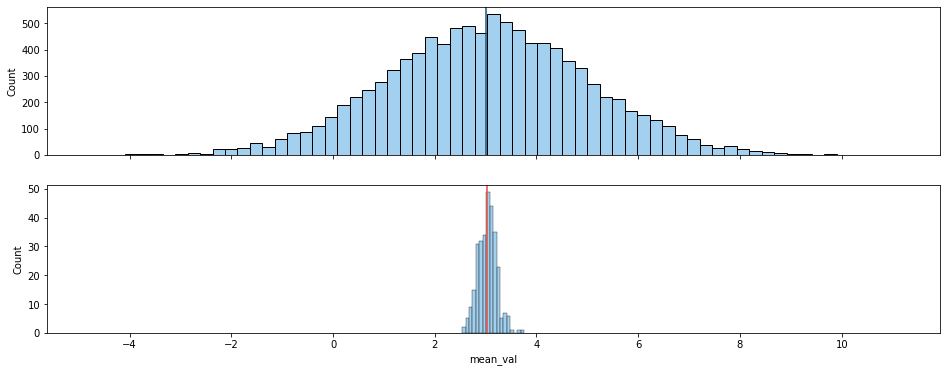

In [34]:
f, (ax_genpop, ax_samples_means) = plt.subplots(2, sharex=True, figsize=(16, 6), gridspec_kw={"height_ratios": (.35, .35)})

sns.histplot(x=genpop, ax=ax_genpop, color='#85C1E9')
ax_genpop.axvline(M,  color='#1A5276')

sns.histplot(x=samples_stats.mean_val, ax=ax_samples_means, color='#85C1E9')
ax_samples_means.axvline(samples_stats.mean_val.mean(), color='#E74C3C');

In [12]:
def confidence_interval(n, mean_val, std_val, target_interval):
    alpha = 1 - target_interval
    z = abs(st.norm.ppf(alpha/2)) # 1.96
    se = std_val / np.sqrt(n)
    
    conf_val = np.round(z*se, 2)
    return conf_val, (np.round(mean_val - conf_val, 2), np.round(mean_val + conf_val, 2))

samples_stats[['conf_val', 'interval']] = samples_stats.apply(lambda row: confidence_interval(row.n, row.mean_val, row.std_val, 0.95), axis=1).apply(pd.Series)
samples_stats[['ci_left', 'ci_right']] = samples_stats.interval.apply(pd.Series)

In [13]:
samples_stats['error'] = samples_stats.apply(lambda row: ((row['ci_left'] > M) | (row['ci_right'] < M)), axis=1)
samples_stats.error.value_counts(normalize=True)

False    0.943333
True     0.056667
Name: error, dtype: float64

Провизуализируем примеры доверительных интервалов для случаев когда среднее генеральной совокупности:
1) Попадает в доверительный интервал выборки

2) Не попадает и находится левее

3) Не попадает и находится правее

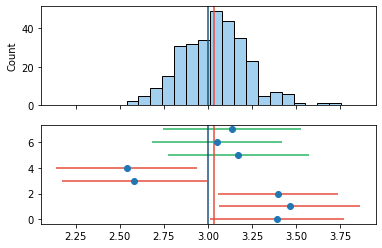

In [14]:
f, (ax_sample_hist, ax_intervals) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .85)})

sns.histplot(x=samples_stats.mean_val, ax=ax_sample_hist, color='#85C1E9')
ax_sample_hist.axvline(M,  color='#1A5276')
ax_sample_hist.axvline(samples_stats.mean_val.mean(),  color='#E74C3C')



n_intervals = 10
intervals = pd.concat([
    samples_stats[samples_stats['ci_left'] > M].iloc[:n_intervals//3],
    samples_stats[samples_stats['ci_right'] < M].iloc[:n_intervals//3],
    samples_stats[~((samples_stats['ci_left'] > M) | (samples_stats['ci_right'] < M))].iloc[:n_intervals//3],
])
intervals['color'] = intervals.apply(lambda row: '#E74C3C' if ((row['ci_left'] > M) | (row['ci_right'] < M)) else '#28B463', axis=1)

ax_intervals.errorbar(
    intervals.mean_val, 
    list(range(intervals.shape[0])), 
    xerr=[intervals.conf_val, intervals.conf_val], 
    fmt='o',
    ecolor=intervals.color.values
)

ax_intervals.axvline(M,  color='#1A5276')
ax_intervals.axvline(samples_stats.mean_val.mean(),  color='#E74C3C');

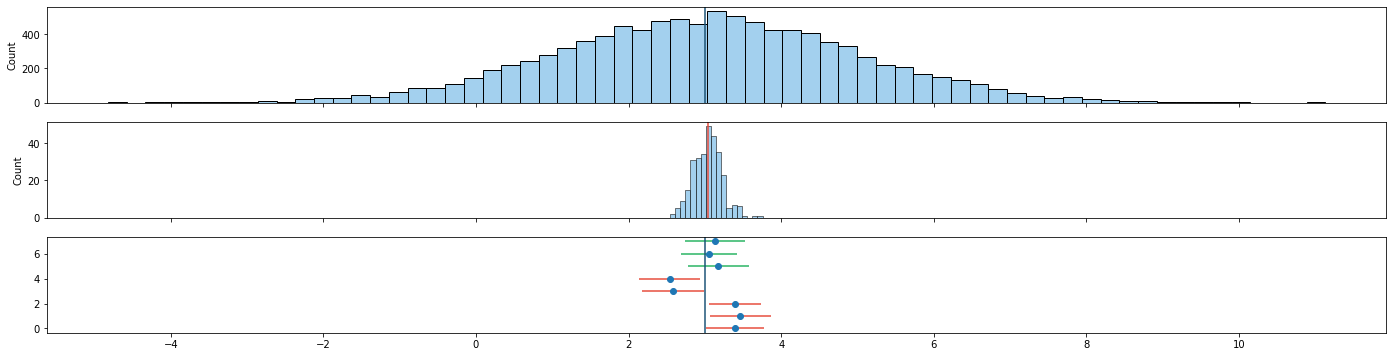

In [27]:
n_plots = 3
fig, (ax_genpop_hist, ax_sample_means, ax_intervals) = plt.subplots(n_plots, sharex=True, figsize=(n_plots*8, n_plots*2))


sns.histplot(x=genpop, ax=ax_genpop_hist, color='#85C1E9')
ax_genpop_hist.axvline(M,  color='#1A5276')

sns.histplot(x=samples_stats.mean_val, ax=ax_sample_means, color='#85C1E9')
ax_sample_means.axvline(samples_stats.mean_val.mean(),  color='#E74C3C')

ax_intervals.errorbar(
    intervals.mean_val, 
    list(range(intervals.shape[0])), 
    xerr=[intervals.conf_val, intervals.conf_val], 
    fmt='o',
    ecolor=intervals.color.values
)

ax_intervals.axvline(M,  color='#1A5276');

Если бы мы взяли из генеральной совокупности много выборок, то по центральной предельной теореме, их средние распределились бы нормально вокруг среднего генеральной совокупности. При этом 95% средних находилсь бы в интервале +-2 стандартных отклонений...

## Рассчитать доверительный интервал для одной выборки

In [116]:
M = 3 
sigma = 2 
N = 10_000

genpop = pd.Series(np.random.normal(M, sigma, N))

In [117]:
n = 100
sample = genpop.sample(n=n)

m = sample.mean()
std = sample.std() # Это упрощение - на самом деле здесь нужно задействовать распределение Стьюдента. Но это потом

#### Custom function

In [146]:
def confidence_interval(n, mean_val, std_val, target_interval):
    alpha = 1 - target_interval
    z = abs(st.norm.ppf(alpha/2)) # 1.96
    se = std_val / np.sqrt(n)
    
    conf_val = np.round(z*se, 2)
    return conf_val, (np.round(mean_val - conf_val, 2), np.round(mean_val + conf_val, 2))



z = 0.99
cval, ci = confidence_interval(n, m, std, z) 

print(f'{M} +- {cval}')
ci

3 +- 0.54


(2.6, 3.68)

#### [scipy.stats.t.interval](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)

In [147]:
st.t.interval(z, len(sample)-1, loc=np.mean(sample), scale=st.sem(sample))

(2.590875170698548, 3.697197271910188)

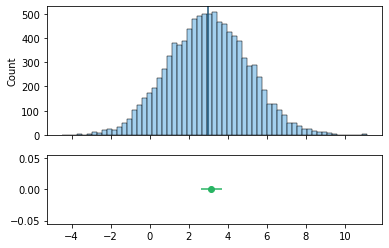

In [148]:
f, (ax_hist, ax_intervals) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.65, .35)})

sns.histplot(x=genpop, ax=ax_hist, color='#85C1E9')
ax_hist.axvline(M,  color='#1A5276')

ax_intervals.errorbar(
    [m], 
    [0], 
    xerr=[[cval],[cval]],
    fmt='o',
    color='#28B463'
);

# Bootstrapping

- [Medium: Resampling (Bootstrapping & Permutation Testing)](https://medium.com/@mattheweparker/common-machine-learning-resampling-methods-like-bootstrapping-and-permutation-testing-attempt-to-ddc4fbbda391)

**Bootstrap** — практический компьютерный метод исследования распределения статистик вероятностных распределений, основанный на многократной генерации выборок методом Монте-Карло на базе имеющейся выборки. Позволяет просто и быстро оценивать самые разные статистики для сложных моделей.

- Если выборка репрезентативна, то ее можно рассматривать как модель генеральной совокупности.
- Bootstrap не является спасением от маленьких выборок.

In [32]:
n_vals = 100
one_sample = genpop.sample(n=n_vals)

## Проверка устойчивости метода

In [88]:
l = []
n_bootstrap = 300
n_iterations = 9

for i in range(n_iterations):
    l.append([one_sample.sample(n_vals, replace=True).mean() for b in range(n_bootstrap)])

iterations = pd.DataFrame(l)

In [100]:
inds = list(range(iterations.shape[0]))

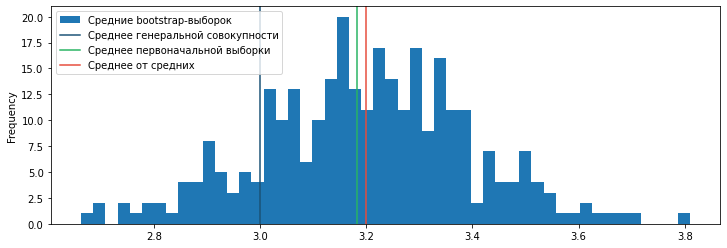

In [101]:
i = inds.pop(0) 

fig = plt.figure(figsize = (12, 4))
ax = fig.gca()
iterations.iloc[i].plot.hist(bins=50, ax = ax, label = 'Средние bootstrap-выборок')

plt.axvline(M,  color='#1A5276', label='Среднее генеральной совокупности')
plt.axvline(one_sample.mean(),  color='#28B463', label = 'Среднее первоначальной выборки')
plt.axvline(iterations.iloc[i].mean(),  color='#E74C3C', label = 'Среднее от средних')
plt.legend(loc='upper left');

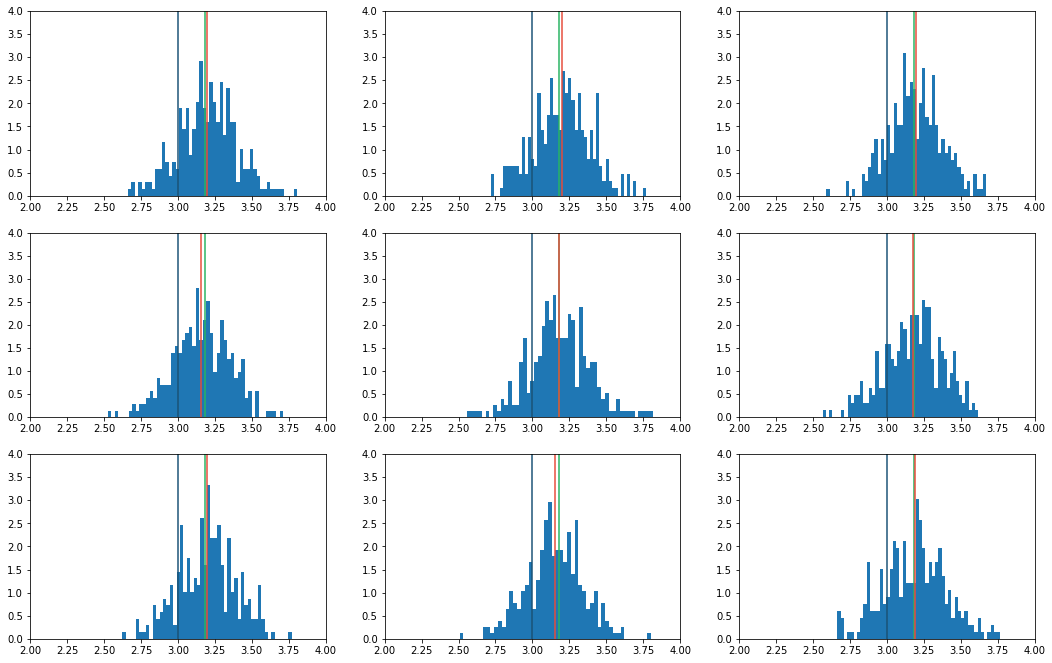

In [109]:
n = iterations.shape[0]

plt.figure(figsize=(n*2, n * 4))
for i in range(n):
    plt.subplot(n, 3, i+1)
    plt.axis([2, 4, 0, 4])
    plt.hist(iterations.iloc[i], bins=50, density=True)
    
    plt.axvline(M,  color='#1A5276')
    plt.axvline(one_sample.mean(),  color='#28B463')
    plt.axvline(iterations.iloc[i].mean(),  color='#E74C3C')
    
plt.show()

## Оценка среднего значения 

In [110]:
n_bootstrap = 300
bootstrap = pd.DataFrame([one_sample.sample(n_vals, replace=True).tolist() for b in range(n_bootstrap)])

In [111]:
def confidence_interval(n, mean_val, std_val, target_interval):
    alpha = 1 - target_interval
    z = abs(st.norm.ppf(alpha/2)) # 1.96
    se = std_val / np.sqrt(n)
    
    conf_val = np.round(z*se, 2)
    return conf_val, (np.round(mean_val - conf_val, 2), np.round(mean_val + conf_val, 2))

bootstrap_stats = pd.DataFrame({
    'n': bootstrap.apply(lambda row: len(row), axis=1),
    'mean_val': bootstrap.apply(lambda row: row.mean(), axis=1),
    'std_val': bootstrap.apply(lambda row: row.std(), axis=1),
})

bootstrap_stats[['conf_val', 'interval']] = bootstrap_stats.apply(lambda row: confidence_interval(row.n, row.mean_val, row.std_val, 0.95), axis=1).apply(pd.Series)
bootstrap_stats[['ci_left', 'ci_right']] = bootstrap_stats.interval.apply(pd.Series)

In [112]:
bootstrap_stats['error'] = bootstrap_stats.apply(lambda row: ((row['ci_left'] > M) | (row['ci_right'] < M)), axis=1)
bootstrap_stats.error.value_counts(normalize=True)

False    0.816667
True     0.183333
Name: error, dtype: float64

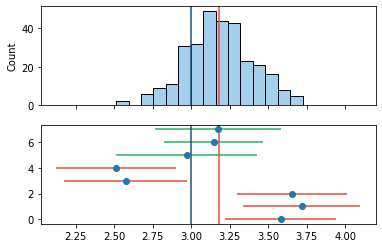

In [113]:
f, (ax_hist, ax_intervals) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .85)})

sns.histplot(x=bootstrap_stats.mean_val, ax=ax_hist, color='#85C1E9')
ax_hist.axvline(M,  color='#1A5276')
ax_hist.axvline(bootstrap_stats.mean_val.mean(),  color='#E74C3C')


n_intervals = 10
intervals = pd.concat([
    bootstrap_stats[bootstrap_stats['ci_left'] > M].iloc[:n_intervals//3],
    bootstrap_stats[bootstrap_stats['ci_right'] < M].iloc[:n_intervals//3],
    bootstrap_stats[~((bootstrap_stats['ci_left'] > M) | (bootstrap_stats['ci_right'] < M))].iloc[:n_intervals//3],
])
intervals['color'] = intervals.apply(lambda row: '#E74C3C' if ((row['ci_left'] > M) | (row['ci_right'] < M)) else '#28B463', axis=1)

ax_intervals.errorbar(
    intervals.mean_val, 
    list(range(intervals.shape[0])), 
    xerr=[intervals.conf_val, intervals.conf_val], 
    fmt='o',
    ecolor=intervals.color.values
)

ax_intervals.axvline(M,  color='#1A5276')
ax_intervals.axvline(bootstrap_stats.mean_val.mean(),  color='#E74C3C');

При повторении эксперимента, точность bootstrap-выборки варьируется от 60 до 95%. В этом плане подход с несколькими выборками дает более точные, устойчивые результаты. Почему так?

#### [Pandas doc: pandas.plotting.bootstrap_plot](https://pandas.pydata.org/docs/reference/api/pandas.plotting.bootstrap_plot.html)

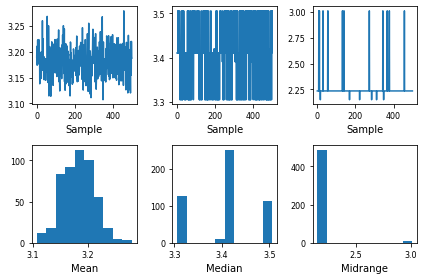

In [114]:
pd.plotting.bootstrap_plot(
    one_sample, 
    size=98, # Почему-то работает странно, если добавить сюда n_vals
    samples=500
);

### Старые заметки

Confidence Interval = x(+/-)t*(s/√n)

x: sample mean

t: t-value that corresponds to the confidence level

s: sample standard deviation

n: sample size

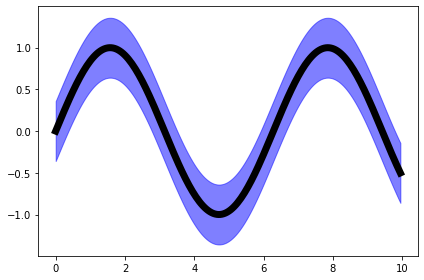

In [13]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.arange(0, 10, 0.05)
y = np.sin(x)

# Define the confidence interval
ci = 0.1 * np.std(y) / np.mean(y)

plt.plot(x, y, color='black', lw=7)

plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.5)

plt.show()

## T

### Пример 1

In [7]:
# define sample data
gfg_data = [
    1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
    3, 4, 4, 5, 5, 5, 6, 7, 8, 10]

# create 90% confidence interval
st.t.interval(
    alpha=0.90, 
    df=len(gfg_data)-1,
    loc=np.mean(gfg_data),
    scale=st.sem(gfg_data)
)

(2.962098014195961, 4.837901985804038)

### Пример 2

In [8]:
import numpy as np
import scipy.stats as st
  
# define sample data
gfg_data = [
    1, 1, 1, 2, 2, 2, 3, 3, 3,
    3, 3, 4, 4, 5, 5, 5, 6,
    7, 8, 10]
  
# create 99% confidence interval
st.t.interval(
    alpha=0.99,
    df=len(gfg_data)-1,
    loc=np.mean(gfg_data), 
    scale=st.sem(gfg_data)
)

(2.3481954013214263, 5.4518045986785735)

## Norm

In [9]:
# define sample data
gfg_data = np.random.randint(5, 10, 100)
  
# create 90% confidence interval
# for population mean weight
st.norm.interval(
    alpha=0.90,
    loc=np.mean(gfg_data),
    scale=st.sem(gfg_data)
)

(6.650557051936708, 7.129442948063291)

In [10]:
# define sample data
gfg_data = np.random.randint(5, 10, 100)
  
# create 99% confidence interval
# for population mean weight
st.norm.interval(
    alpha=0.99, 
    loc=np.mean(gfg_data),
    scale=st.sem(gfg_data)
)

(6.577907690622409, 7.342092309377591)

In [294]:
def confidence_interval(n, mean_val, std_val, target_interval):
    alpha = 1 - target_interval
    z = abs(st.norm.ppf(alpha/2)) # 1.96
    se = std_val / np.sqrt(n)
    return (round(mean_val - z * se,  2),  round(mean_val + z * se,  2))

n = 64
mean_val = 18.5
std_val = 4
target_interval = 0.95

confidence_interval(n, mean_val, std_val, target_interval)

(17.52, 19.48)

In [295]:
abs(st.norm.ppf(alpha/2))

1.9599639845400545